In [29]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/forest-cover-type-dataset/covtype.csv


In [30]:
df = pd.read_csv('/kaggle/input/forest-cover-type-dataset/covtype.csv')

df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [31]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


## Basic Exploration

In [32]:
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


Good, we don't have any null values to deal with

In [33]:
#Lets look at the target
sorted(df['Cover_Type'].unique())

[1, 2, 3, 4, 5, 6, 7]

In [34]:
df['Cover_Type'].value_counts().sort_index()

Cover_Type
1    211840
2    283301
3     35754
4      2747
5      9493
6     17367
7     20510
Name: count, dtype: int64

In [35]:
## We are dealing with some imbalanced data

In [36]:
text = """
Elevation / quantitative /meters / Elevation in meters
Aspect / quantitative / azimuth / Aspect in degrees azimuth
Slope / quantitative / degrees / Slope in degrees
Horizontal_Distance_To_Hydrology / quantitative / meters / Horz Dist to nearest surface water features
Vertical_Distance_To_Hydrology / quantitative / meters / Vert Dist to nearest surface water features
Horizontal_Distance_To_Roadways / quantitative / meters / Horz Dist to nearest roadway
Hillshade_9am / quantitative / 0 to 255 index / Hillshade index at 9am, summer solstice
Hillshade_Noon / quantitative / 0 to 255 index / Hillshade index at noon, summer soltice
Hillshade_3pm / quantitative / 0 to 255 index / Hillshade index at 3pm, summer solstice
Horizontal_Distance_To_Fire_Points / quantitative / meters / Horz Dist to nearest wildfire ignition points
Wilderness_Area (4 binary columns) / qualitative / 0 (absence) or 1 (presence) / Wilderness area designation
Soil_Type (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
Cover_Type (7 types) / integer / 1 to 7 / Forest Cover Type designation
"""

columns = """Name / Data Type / Measurement / Description"""


def data_dictionary():
    col_name = []
    data_type = []
    measurement = []
    description = []
    
    for items in text.split('\n'):

        if len(items.split(' /')) == 1:
            pass
        else:
            col_name.append(items.split(' /')[0])
            data_type.append(items.split(' /')[1])
            measurement.append(items.split(' /')[2])
            description.append(items.split(' /')[3])
    
    
    data_dict = pd.DataFrame({'Name':col_name, 'DataType': data_type, 'Measurement': measurement, 'Description': description})
    
    return data_dict


    
        
data_dictionary()


,Name,DataType,Measurement,Description
0,Elevation,quantitative,meters,Elevation in meters
1,Aspect,quantitative,azimuth,Aspect in degrees azimuth
2,Slope,quantitative,degrees,Slope in degrees
3,Horizontal_Distance_To_Hydrology,quantitative,meters,Horz Dist to nearest surface water features
4,Vertical_Distance_To_Hydrology,quantitative,meters,Vert Dist to nearest surface water features
5,Horizontal_Distance_To_Roadways,quantitative,meters,Horz Dist to nearest roadway
6,Hillshade_9am,quantitative,0 to 255 index,"Hillshade index at 9am, summer solstice"
7,Hillshade_Noon,quantitative,0 to 255 index,"Hillshade index at noon, summer soltice"
8,Hillshade_3pm,quantitative,0 to 255 index,"Hillshade index at 3pm, summer solstice"
9,Horizontal_Distance_To_Fire_Points,quantitative,meters,Horz Dist to nearest wildfire ignition points


In [37]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


# EDA

## Column Inspection

1. Elevation

In [38]:
df['Elevation'].describe()

count    581012.000000
mean       2959.365301
std         279.984734
min        1859.000000
25%        2809.000000
50%        2996.000000
75%        3163.000000
max        3858.000000
Name: Elevation, dtype: float64

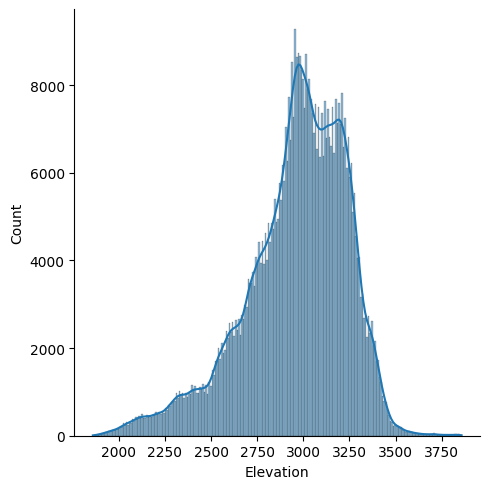

In [40]:
sns.displot(df['Elevation'], kde=True)
plt.show()

2. Aspect

In [42]:
df['Aspect'].describe()

count    581012.000000
mean        155.656807
std         111.913721
min           0.000000
25%          58.000000
50%         127.000000
75%         260.000000
max         360.000000
Name: Aspect, dtype: float64

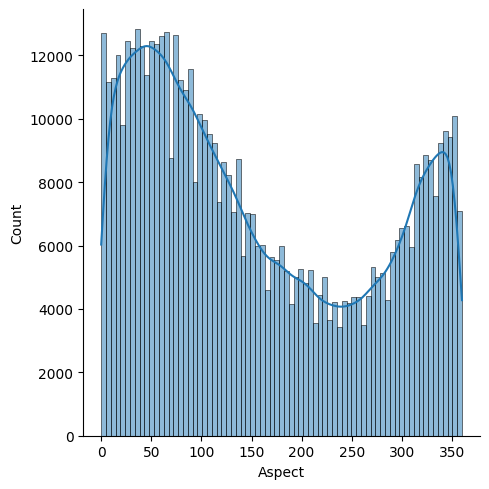

In [43]:
sns.displot(df['Aspect'], kde=True)
plt.show()

Slope

In [45]:
df['Slope'].describe()

count    581012.000000
mean         14.103704
std           7.488242
min           0.000000
25%           9.000000
50%          13.000000
75%          18.000000
max          66.000000
Name: Slope, dtype: float64

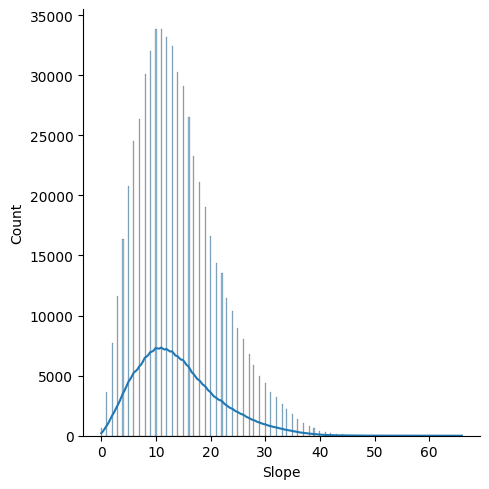

In [46]:
sns.displot(df['Slope'], kde=True)
plt.show()

## Skewness

In [103]:
print('Skewness of the below features:')
print(df.skew())

Skewness of the below features:
Elevation                              -0.817596
Aspect                                  0.402628
Slope                                   0.789273
Horizontal_Distance_To_Hydrology        1.140437
Vertical_Distance_To_Hydrology          1.790250
Horizontal_Distance_To_Roadways         0.713679
Hillshade_9am                          -1.181147
Hillshade_Noon                         -1.063056
Hillshade_3pm                          -0.277053
Horizontal_Distance_To_Fire_Points      1.288644
Wilderness_Area1                        0.205618
Wilderness_Area2                        4.061595
Wilderness_Area3                        0.257822
Wilderness_Area4                        3.575561
Soil_Type1                             13.736670
Soil_Type2                              8.615358
Soil_Type3                             10.838630
Soil_Type4                              6.625176
Soil_Type5                             18.995243
Soil_Type6                           

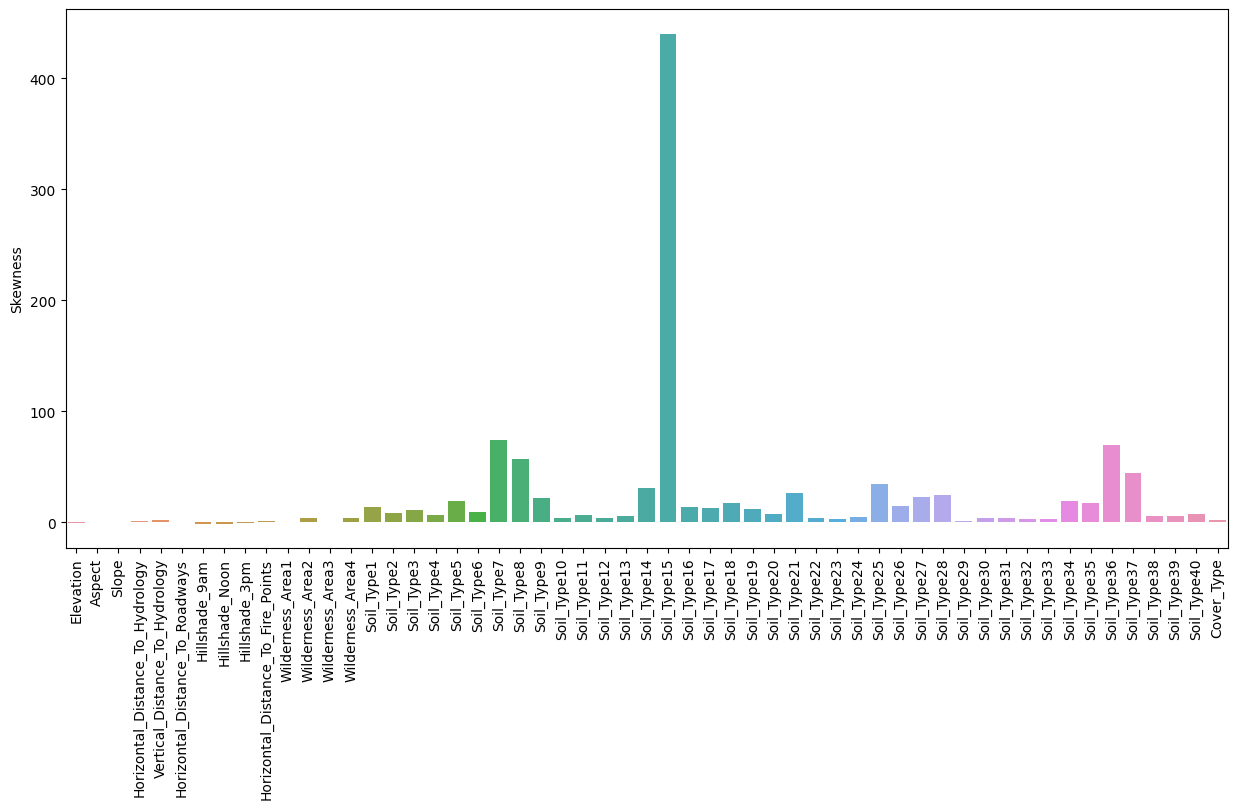

In [105]:
skew=df.skew()
skew_df=pd.DataFrame(skew,index=None,columns=['Skewness'])
plt.figure(figsize=(15,7))
sns.barplot(x=skew_df.index,y='Skewness',data=skew_df)
plt.xticks(rotation=90)
plt.show()

Some of the columns are very heavily skewed and needs to be corrected/adjusted or dropped later on

## Class Imbalance

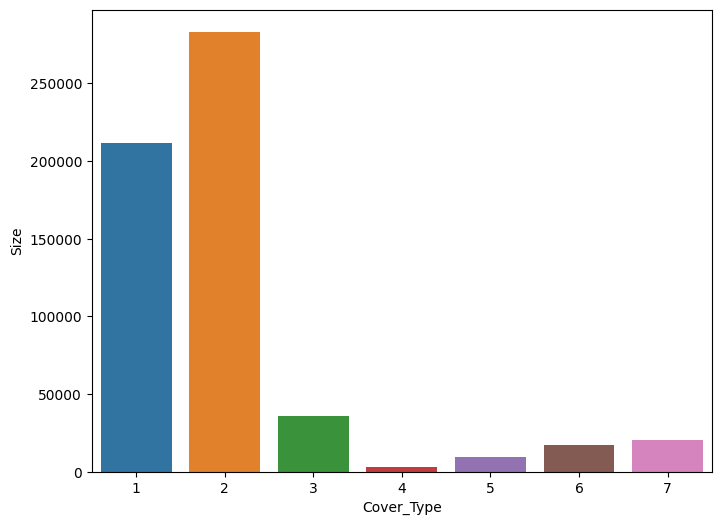

In [108]:
class_dist=df.groupby('Cover_Type').size()
class_label=pd.DataFrame(class_dist,columns=['Size'])
plt.figure(figsize=(8,6))
sns.barplot(x=class_label.index,y='Size',data=class_label)
plt.show()

In [125]:
c1 = []
c2 = []

for i,number in enumerate(class_dist):
    percent=(number/class_dist.sum())*100
    c1.append('Cover_Type_' + str(class_dist.index[i]))
    c2.append("{:.2f}%".format(percent))
    
df_type_perc = pd.DataFrame({'CoverType':c1,
              'perc':c2})

df_type_perc

,CoverType,perc
0,Cover_Type_1,36.46%
1,Cover_Type_2,48.76%
2,Cover_Type_3,6.15%
3,Cover_Type_4,0.47%
4,Cover_Type_5,1.63%
5,Cover_Type_6,2.99%
6,Cover_Type_7,3.53%


In [127]:
df['Cover_Type'].value_counts()

Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64

### Exploring the data a bit more

In [128]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [ ]:
cont_data - Data without binary features i.e continuous features
binary_Data - Data having all binary features [Wilderness Areas + Soil Types]
wilderness_Data - Binary Wilderness Areas
Soil_Data - Binary Soil Types

________________________________

# Model Building

## Baseline Model

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score

In [56]:
X = df.iloc[:,:-1]
y = df['Cover_Type']

In [76]:
#Features to be removed before the model
rem=['Hillshade_3pm','Soil_Type7','Soil_Type8','Soil_Type14','Soil_Type15',
     'Soil_Type21','Soil_Type25','Soil_Type28','Soil_Type36','Soil_Type37']

#Remove the unwanted features
X.drop(rem, axis=1, inplace=True)

In [77]:
print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')

Shape of X: (581012, 44)
Shape of y: (581012,)


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [79]:
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print("----------------------------")
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (406708, 44)
Shape of X_test: (174304, 44)
----------------------------
Shape of y_train: (406708,)
Shape of y_test: (174304,)


In [80]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train,y_train)
X_test_scaled = scaler.transform(X_test)

In [81]:
clf = RandomForestClassifier()

clf.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [82]:
y_pred = clf.predict(X_test)

In [83]:
## Accuracy: 
print(f'Accuracy: {accuracy_score(y_pred,y_test)}')

## F1 Score: 
print(f"F1 Score: {f1_score(y_pred,y_test,average='macro')}")


Accuracy: 0.25901298880117496
F1 Score: 0.10850346205964004


In [84]:
import scipy.stats as ss
from statsmodels.formula.api import ols
from scipy.stats import zscore
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns

In [99]:
%%time
MLA = []
# Z = [LinearSVC() , DecisionTreeClassifier() , LogisticRegression() , GaussianNB() ,RandomForestClassifier() , 
#      GradientBoostingClassifier()]
# X = ["LinearSVC" , "DecisionTreeClassifier" , "LogisticRegression" , "GaussianNB" ,"RandomForestClassifier" , 
#      "GradientBoostingClassifier"]

Z = [RandomForestClassifier()]
X = ['RandomForestClassifier']

for i in range(0,len(Z)):
    model = Z[i]
    model.fit( X_train_scaled , y_train )
    pred = model.predict(X_test_scaled)
    MLA.append(accuracy_score(pred , y_test))

CPU times: user 1min 44s, sys: 86.8 ms, total: 1min 44s
Wall time: 1min 44s


In [102]:
## F1 Score: 
print(f"F1 Score: {f1_score(pred,y_test,average='macro')}")

F1 Score: 0.9270312933688685


In [98]:
df.std().sort_values().head(10).sort_index()

Soil_Type14    0.032092
Soil_Type15    0.002272
Soil_Type21    0.037950
Soil_Type25    0.028551
Soil_Type27    0.043193
Soil_Type28    0.040318
Soil_Type36    0.014310
Soil_Type37    0.022641
Soil_Type7     0.013442
Soil_Type8     0.017550
dtype: float64

In [ ]:
#Features to be removed before the model
rem=['Hillshade_3pm','Soil_Type7','Soil_Type8','Soil_Type14','Soil_Type15',
     'Soil_Type21','Soil_Type25','Soil_Type28','Soil_Type36','Soil_Type37']